## HT9 - Proyecto 2. Entrega 7
### RNA
Diego Duarte 22075 - José Marchena 22398

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import rna

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

In [2]:
house_prices = rna.drop_many_nulls(house_prices)
house_prices = rna.trans_categorical(house_prices)

c:\Users\diego\OneDrive\Escritorio\2025\Semestre VII\Mineria\RNA\rna.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


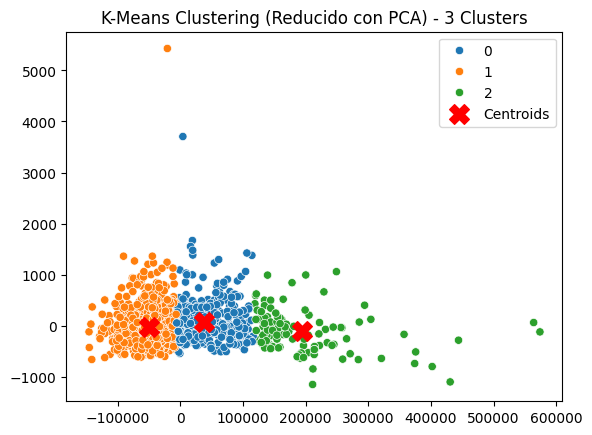

In [3]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict


cluster_set = house_prices[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

cluster_set = rna.breif_clustering(cluster_set, 3)

In [4]:
tem = house_prices[house_prices.columns]
object_cols = tem.select_dtypes(include=['object']).columns
fuzzy_hp = pd.get_dummies(tem, columns=object_cols, drop_first=True)
fuzzy_hp['SpThird'] = cluster_set['Cluster']
fuzzy_hp.pop('SalePrice')
fuzzy_hp.groupby('SpThird').size()

SpThird
0    518
1    826
2    116
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_houses = scaler.fit_transform(house_prices)

# Añadir la columna de clusters al DataFrame original
house_prices['price_group'] = cluster_set['Cluster']

# Reemplazar los valores numéricos por etiquetas de texto
label_map = {
    0: 'medio',
    1: 'barato',
    2: 'caro'
}
house_prices['price_group'] = house_prices['price_group'].map(label_map)

### MODELO 1

In [6]:
from sklearn.compose import make_column_selector as selector 


target = house_prices['price_group']
features = house_prices.drop(columns='price_group')

selector_numericas = selector(dtype_exclude=object) #Seleccionamos todas las variables que no son Object
selector_categoricas = selector(dtype_include=object) #Seleccionamos todas las varibles de tipo object
#Seleccionamos las columnas que cumplen con los selectores pasándole los datos
numericas = selector_numericas(features)
categoricas = selector_categoricas(features)


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico,categoricas),
    ('standard_scaler',preprocesador_numerico, numericas)
])

In [8]:
modelo1 = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(5,3)))
modelo1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [9]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target, train_size=0.7,test_size=0.3)
print("Shape train",data_train.shape)
print("Shape test",data_test.shape)
features.isnull().sum()

Shape train (1021, 56)
Shape test (438, 56)


MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
MoSold           0
YrSold      

In [10]:
modelo1.fit(data_train,target_train)

Iteration 1, loss = 0.91440638
Iteration 2, loss = 0.88149195
Iteration 3, loss = 0.84871556
Iteration 4, loss = 0.81767413
Iteration 5, loss = 0.78854309
Iteration 6, loss = 0.76126105
Iteration 7, loss = 0.73727106
Iteration 8, loss = 0.71485733
Iteration 9, loss = 0.69474566
Iteration 10, loss = 0.67610010
Iteration 11, loss = 0.65939889
Iteration 12, loss = 0.64375386
Iteration 13, loss = 0.62936427
Iteration 14, loss = 0.61581716
Iteration 15, loss = 0.60346856
Iteration 16, loss = 0.59213284
Iteration 17, loss = 0.58110857
Iteration 18, loss = 0.57102648
Iteration 19, loss = 0.56114709
Iteration 20, loss = 0.55220803
Iteration 21, loss = 0.54378807
Iteration 22, loss = 0.53577000
Iteration 23, loss = 0.52819181
Iteration 24, loss = 0.52086541
Iteration 25, loss = 0.51410702
Iteration 26, loss = 0.50751176
Iteration 27, loss = 0.50124734
Iteration 28, loss = 0.49527620
Iteration 29, loss = 0.48965839
Iteration 30, loss = 0.48415338
Iteration 31, loss = 0.47895052
Iteration 32, los

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [11]:
pred1 = modelo1.predict(data_test)
pred1[:5]

array(['medio', 'medio', 'barato', 'medio', 'barato'], dtype='<U6')

Precisión del modelo: 0.90
              precision    recall  f1-score   support

      barato       0.94      0.94      0.94       263
        caro       0.76      0.85      0.80        26
       medio       0.86      0.85      0.85       149

    accuracy                           0.90       438
   macro avg       0.85      0.88      0.86       438
weighted avg       0.90      0.90      0.90       438



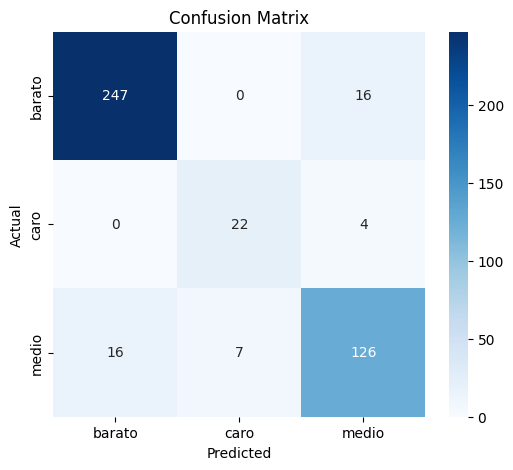

In [12]:
rna.metrics_and_cm(pred1, target_test)

### MODELO 2

In [13]:
modelo2 = make_pipeline(preprocesador,MLPClassifier(activation="relu",verbose=True,hidden_layer_sizes=(50,15), random_state=42))
modelo2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(50, 15), random_state=42,
                               verbose=True))])

In [14]:
modelo2.fit(data_train,target_train)

Iteration 1, loss = 1.02715378
Iteration 2, loss = 0.87261158
Iteration 3, loss = 0.76051892
Iteration 4, loss = 0.67379196
Iteration 5, loss = 0.60483831
Iteration 6, loss = 0.54943518
Iteration 7, loss = 0.50420300
Iteration 8, loss = 0.46772151
Iteration 9, loss = 0.43590447
Iteration 10, loss = 0.41042941
Iteration 11, loss = 0.38814078
Iteration 12, loss = 0.36937127
Iteration 13, loss = 0.35126752
Iteration 14, loss = 0.33699525
Iteration 15, loss = 0.32273304
Iteration 16, loss = 0.30946585
Iteration 17, loss = 0.29741725
Iteration 18, loss = 0.28603704
Iteration 19, loss = 0.27582921
Iteration 20, loss = 0.26659886
Iteration 21, loss = 0.25724721
Iteration 22, loss = 0.24900310
Iteration 23, loss = 0.24047350
Iteration 24, loss = 0.23221801
Iteration 25, loss = 0.22501123
Iteration 26, loss = 0.21729623
Iteration 27, loss = 0.21026574
Iteration 28, loss = 0.20373072
Iteration 29, loss = 0.19697955
Iteration 30, loss = 0.19142175
Iteration 31, loss = 0.18526813
Iteration 32, los

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(50, 15), random_state=42,
                               verbose=True))])

In [15]:
pred2 = modelo2.predict(data_test)
pred2[:5]

array(['barato', 'medio', 'barato', 'medio', 'barato'], dtype='<U6')

Precisión del modelo: 0.89
              precision    recall  f1-score   support

      barato       0.93      0.94      0.93       263
        caro       0.68      0.81      0.74        26
       medio       0.86      0.80      0.83       149

    accuracy                           0.89       438
   macro avg       0.82      0.85      0.83       438
weighted avg       0.89      0.89      0.89       438



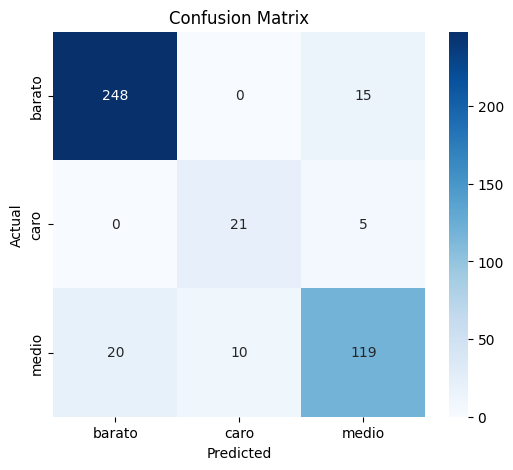

In [16]:
rna.metrics_and_cm(pred2, target_test)